<a href="https://colab.research.google.com/github/iqbalamo93/kerasTF/blob/master/Kera_Classification_EarlyStopping_DropoutLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
url='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Data_Tf_Udemy/cancer_classification.csv'

In [0]:
df = pd.read_csv(url)

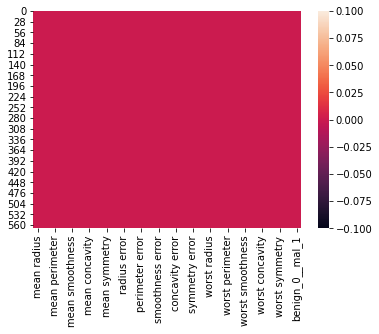

In [22]:
df.isnull().sum()
sns.heatmap(df.isnull())

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


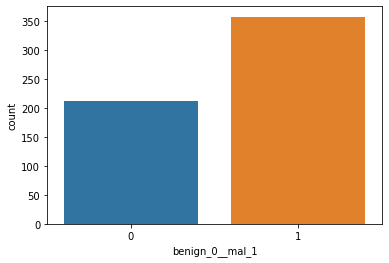

In [24]:
sns.countplot(x='benign_0__mal_1',data=df)

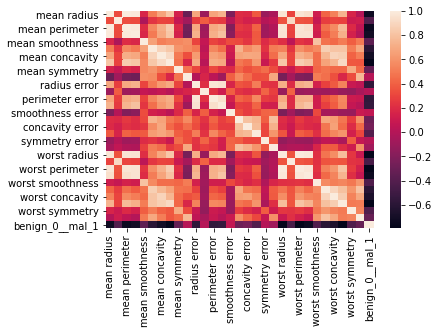

In [25]:
sns.heatmap(df.corr())

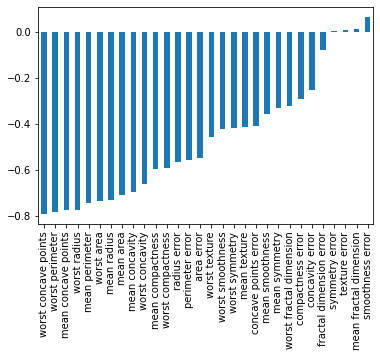

In [34]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')#Cool trick to exclude last one

In [0]:
X= df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:

X_train.shape

(426, 30)

In [0]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [53]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.7176 - val_loss: 0.6872
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6806 - val_loss: 0.6652
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6538 - val_loss: 0.6417
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6255 - val_loss: 0.6129
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5969 - val_loss: 0.5746
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5554 - val_loss: 0.5335
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5158 - val_loss: 0.4893
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4689 - val_loss: 0.4398
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4271 - val_loss: 0.3952
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3875 - val_loss: 0.3541
Epoch 11

In [0]:
losses = pd.DataFrame(model.history.history)

In [0]:
losses.columns = ['Training','Testing']

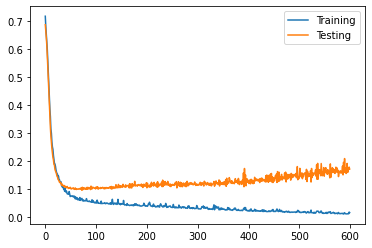

In [56]:
losses.plot()

In [58]:
#Perfect Example of overfitting
#Error on Testing is increasing,We are traing on too much epochs
'''Time to use callbacks'''

'Time to use callbacks'

In [0]:
model_cb = Sequential()
model_cb.add(Dense(30,activation='relu'))
model_cb.add(Dense(15,activation='relu'))

model_cb.add(Dense(1,activation='sigmoid'))

model_cb.compile(loss='binary_crossentropy',optimizer='adam')

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [0]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [79]:
model_cb.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6825 - val_loss: 0.6785
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6566 - val_loss: 0.6545
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6286 - val_loss: 0.6212
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5853 - val_loss: 0.5696
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5270 - val_loss: 0.5120
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4838 - val_loss: 0.4585
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4308 - val_loss: 0.4126
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3885 - val_loss: 0.3670
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3524 - val_loss: 0.3280
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3102 - val_loss: 0.2919
Epoch 11/

In [0]:
model_loss=pd.DataFrame(model_cb.history.history)

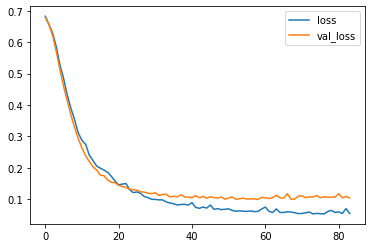

In [81]:
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))#Half of the neurons during each batch,will be turned off i.e their weigh and baise will not get updated

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [90]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6963 - val_loss: 0.6781
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6725 - val_loss: 0.6605
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6547 - val_loss: 0.6468
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6338 - val_loss: 0.6293
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6138 - val_loss: 0.6069
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6037 - val_loss: 0.5815
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5750 - val_loss: 0.5513
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5453 - val_loss: 0.5214
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5432 - val_loss: 0.4964
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5178 - val_loss: 0.4779
Epoch 11/

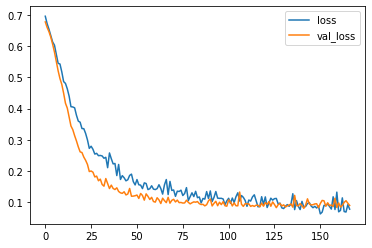

In [91]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [0]:
prediction = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [99]:
print(confusion_matrix(y_test,prediction))

[[54  1]
 [ 1 87]]
